# Part I - ( Trending YouTube Video Statistics in CA )
## by ( Amira Saleh )

YouTube, a well-known video sharing website, maintains a list of the most popular videos. "YouTube uses a variety of metrics, including analyses of user interactions, to select the top-trending videos" (number of views, shares, comments, and likes). Remember that these are not the most viewed videos for the year as a whole. Among the top performers on YouTube's trending list are music videos (such as the notoriously lewd "Gangam Style"), celebrity and/or reality TV performances, and viral videos by random individuals with cameras.

## Introduce the dataset
This dataset keeps track of the most popular YouTube videos on a daily basis.

## Preliminary Wrangling


In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px


%matplotlib inline

In [7]:
df = pd.read_csv("CAvideos.csv")
df.head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0         Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Eminem's new track Walk on Water ft. Beyoncé i...  
1  STill got a lot of packages. Probably will las...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  I know it's been a while since we did this sho...  
4  🎧: https://ad.gt/yt-perfect\n💰: https://atlant...

In [8]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)

(40881, 16)
video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object


In [9]:
df['publish_time'] = df['publish_time'].astype('datetime64')

In [10]:
df['category_id'] = df['category_id'].astype(str)

In [11]:
df['ratings_disabled'] = df['ratings_disabled'].astype(object)

In [12]:
df['date'] = df['publish_time'].dt.date

In [13]:
df.head(2)

video_id trending_date                                       title  \
0  n1WpP7iowLc      17.14.11  Eminem - Walk On Water (Audio) ft. Beyoncé   
1  0dBIkQ4Mz1M      17.14.11               PLUSH - Bad Unboxing Fan Mail   

  channel_title category_id        publish_time  \
0    EminemVEVO          10 2017-11-10 17:00:03   
1     iDubbbzTV          23 2017-11-13 17:00:00   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   

   comments_disabled ratings_disabled  video_error_or_removed  \
0              False            False                   False   
1              False            False                   False   

                                         description        date  
0  Eminem's new track Walk on Water ft. Beyoncé i...  2017-11-10  
1  STill got a lot of packages. Probably will las...  2017-11-13

In [14]:
youtube_dic = {'1' : "Film & Animation", '2' : "Autos & Vehicles" ,'10' : "Music",
               '15': "Pets & Animals", '17' : "Sports", '18' : "Short Movies", '19' : "Travel & Events" ,
               '20' : "Gaming", '21' : "Videoblogging", '22' :"People & Blogs", '23' :"Comedy" ,
               '24' : "Entertainment", '25' : "News & Politics" ,'26' : "Howto & Style", 
               '27' : "Education", '28':"Science & Technology",'29' :"Nonprofits & Activism", 
               '30':"Movies", '43' :"Shows"}

In [15]:
df.replace({'category_id': youtube_dic}, inplace =True)

In [16]:
df= df.rename(columns = {"category_id": "category_name"})

In [17]:
#To know the sum of the null
df.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_name                0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
date                         0
dtype: int64

In [18]:
df['date'] = pd.to_datetime(df['date'])

In [19]:
df=df.dropna()

In [20]:
#Making sure null values has been deleted. 
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_name',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'date'],
      dtype='object')

In [21]:
df.shape

(39585, 17)

In [22]:
df.describe()

views         likes      dislikes  comment_count
count  3.958500e+04  3.958500e+04  3.958500e+04   3.958500e+04
mean   1.169234e+06  4.059694e+04  2.058693e+03   5.159716e+03
std    3.437842e+06  1.345967e+05  1.931258e+04   2.189959e+04
min    7.330000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%    1.497150e+05  2.395000e+03  1.040000e+02   4.420000e+02
50%    3.831200e+05  9.244000e+03  3.140000e+02   1.357000e+03
75%    9.831390e+05  2.967000e+04  9.760000e+02   3.821000e+03
max    1.378431e+08  5.053338e+06  1.602383e+06   1.114800e+06

### What is the structure of your dataset?

> The The primary data set consists of 16 columns and 40881 rows. After cleaning the data we are left with 39065 rows and 16 column
### What is/are the main feature(s) of interest in your dataset?
> 1- Category_name

> 2- Publish_time

> 3- tags

> 4- views

> 5- likes

> 6- dislikes

> 7- comment_count



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
> 1- Trending_date

> 2- ratings_disabled

> 3- video_error_or_removed

> 4-channel_title

### Questions:
> What is the comment_count for the top 10 channels?

> How many categories do we have and what is the propeller one?

> What are the top 10 most disliked videos?

## Univariate Exploration

In [23]:
df_youtube=df.copy()

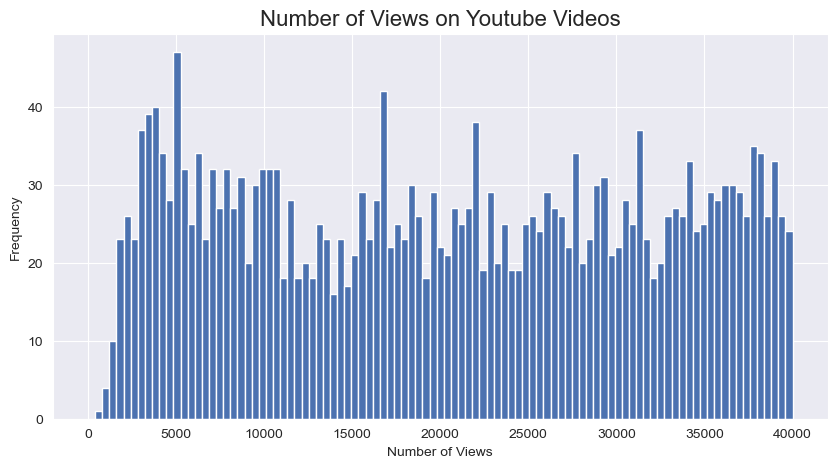

In [24]:
sns.set_style("darkgrid")
sns.set_palette("deep")
bins = np.linspace(start=0, stop=40000, num=100)
plt.figure(figsize=[10, 5])
plt.hist(data=df_youtube, x='views', bins=bins)
plt.title('Number of Views on Youtube Videos', fontsize=16)
plt.xlabel('Number of Views')
plt.ylabel('Frequency')
plt.show()

> from the graph we can see that 5000 views is the most frequent. And it's really rare that a vidoe can get 0 views. The average number of views is above 15000. 

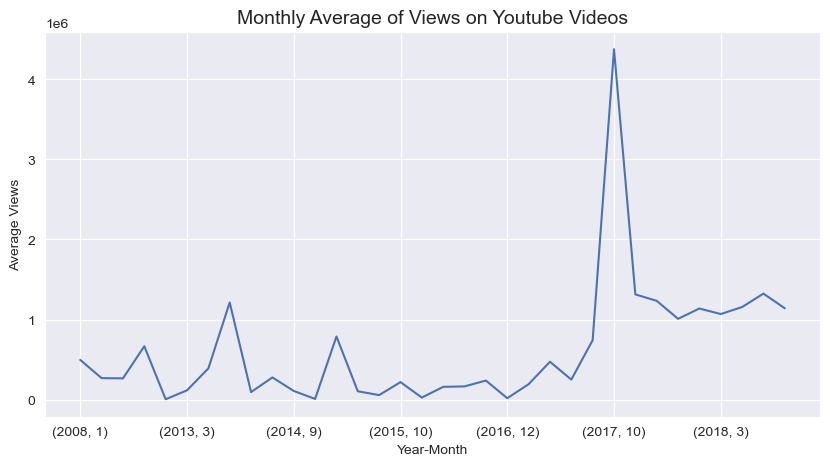

In [25]:
# Compute the monthly average of views
monthly_avg = df_youtube.views.groupby([df_youtube["date"].dt.year.rename('year'), df_youtube["date"].dt.month.rename('month')]).mean()

# Plot the monthly average as a line plot
plt.figure(figsize=[10, 5])
monthly_avg.plot(kind='line')
plt.xlabel('Year-Month')
plt.ylabel('Average Views')
plt.title('Monthly Average of Views on Youtube Videos', fontsize=14)
plt.show()

> The numebr of viwes was pretty consistent from 2008 - 2016 then a jump on the views happend. it's probably beacause of the evolution of technology and accessibility. 

In [26]:
def create_countplot(data, x_column, color=None, order=None):
    if color is not None and order is not None:
        sns.countplot(x=x_column, data=data, color=color, order=order)
    elif color is not None:
        sns.countplot(x=x_column, data=data, color=color)
    elif order is not None:
        sns.countplot(x=x_column, data=data, order=order)
    else:
        sns.countplot(x=x_column, data=data)

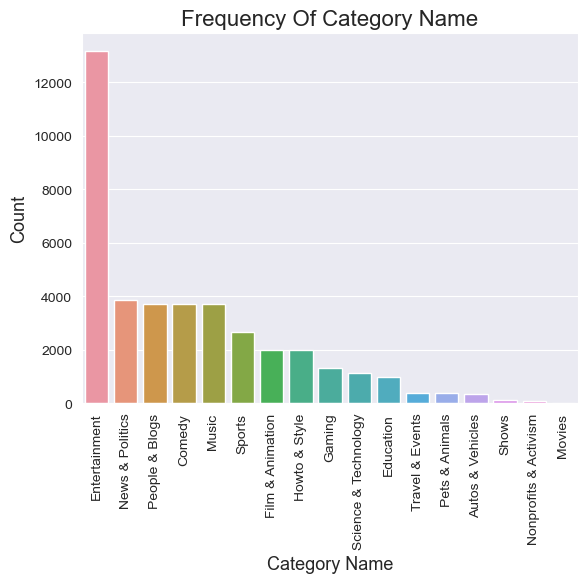

In [27]:
create_countplot(df_youtube, 'category_name', order=df_youtube['category_name'].value_counts().index)
plt.xlabel('Category Name', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.title('Frequency Of Category Name', fontsize=16)
#rotates the column names
plt.xticks(rotation=90);

> Among all the categories, Entertainment got the most views. then New&Politics, People &Blog, Comedy and music are almost have the same nummber of views. 

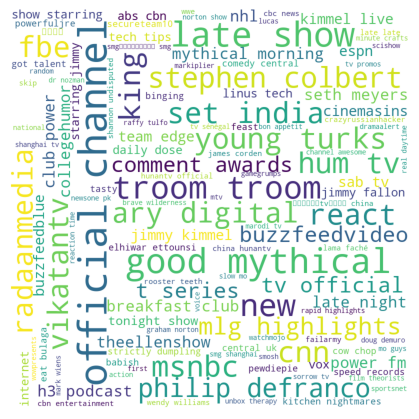

In [28]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df_youtube.channel_title:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

> It looks like Official Channels is the most frequent channel viewd. Late Show and good mythical are the second mmmost viewd. 

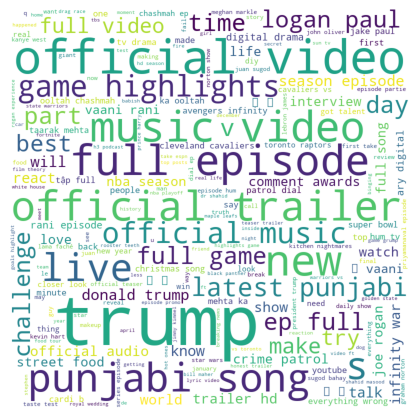

In [29]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df_youtube.title:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

> From the graph above, we can very easily say that trump is the most frequent searched title. 

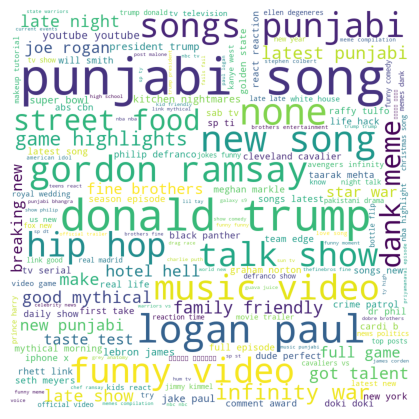

In [30]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df_youtube.tags:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

> From the graph above, we can notice that Punjabi song is the mmost searched tag and donald trump got a high number of tags as well. 

<Figure size 500x1000 with 0 Axes>

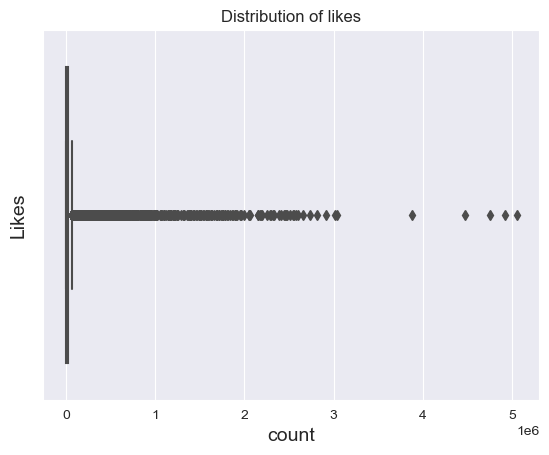

<Figure size 500x1000 with 0 Axes>

In [31]:
sns.boxplot(data=df_youtube, x='likes')
plt.title("Distribution of likes")
plt.ylabel("Likes", size=14)
plt.xlabel("count", size=14)
plt.figure(figsize=(5,10))

> we can say that the average of likes is betwenn 0-2 and very few videos got more than that. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> As we see in the box plot of the likes we have a big outliers.

> The most commen tag is ∅ and ù because it is most often repeat in tages.

> Category type entertainment have the highest frequency and count.

> In year 2017-10 the highest views.

> The most commen channel is official channel

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, the box polt it was strange i did not chang any thing.

## Bivariate Exploration

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'News & Politics'),
  Text(4, 0, 'People & Blogs'),
  Text(5, 0, 'Howto & Style'),
  Text(6, 0, 'Film & Animation'),
  Text(7, 0, 'Science & Technology'),
  Text(8, 0, 'Gaming'),
  Text(9, 0, 'Sports'),
  Text(10, 0, 'Nonprofits & Activism'),
  Text(11, 0, 'Pets & Animals'),
  Text(12, 0, 'Travel & Events'),
  Text(13, 0, 'Autos & Vehicles'),
  Text(14, 0, 'Education'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies')])

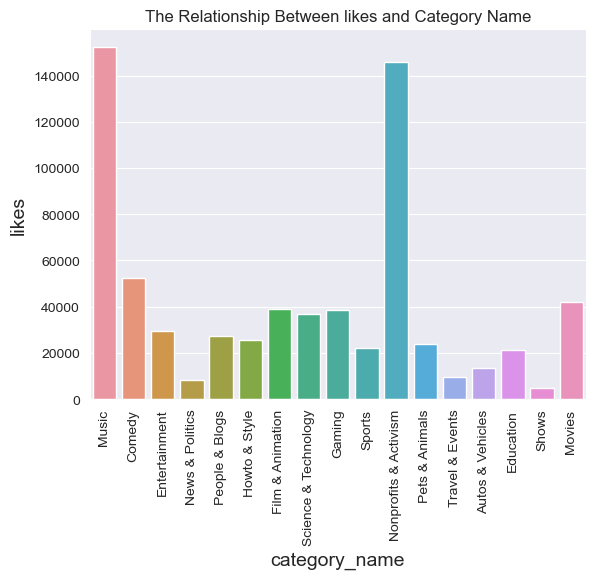

In [32]:
sns.barplot(x = 'category_name',y='likes',data = df_youtube,errorbar=None)
plt.title("The Relationship Between likes and Category Name")
plt.ylabel("likes", size=14)
plt.xlabel("category_name", size=14)
plt.xticks(rotation=90)

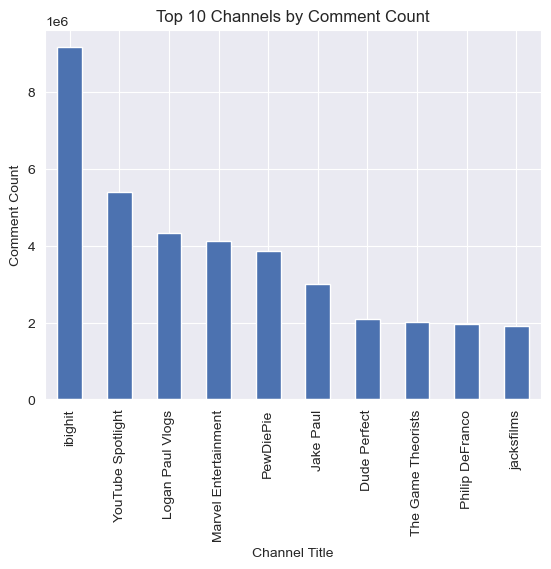

In [33]:
# Group by video ID and sum the comment count for each group
comment_counts = df_youtube.groupby('channel_title').sum()['comment_count']

# Sort by comment count in descending order and take the top 10
top_comment_counts = comment_counts.sort_values(ascending=False)[:10]

# Create a bar plot
top_comment_counts.plot(kind='bar')
plt.title('Top 10 Channels by Comment Count')
plt.xlabel('Channel Title')
plt.ylabel('Comment Count')
plt.show()

> it shown in the graph above that ibighit got the most comments. And there's a huge difference in count between it and all the other channels. probably because of fans also it's a music channel and as we saw ina previous graph music is the mmost viewd vidoes in YouTube. 

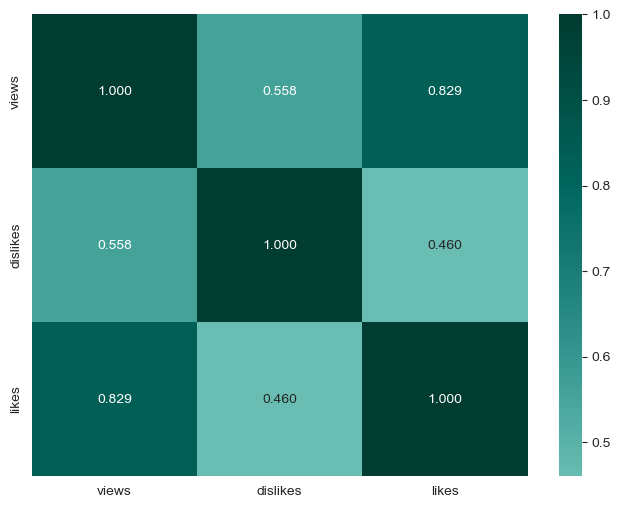

In [34]:
# Correlation plot
sns.set_style("darkgrid")
sns.set_palette("deep")
column_name = ['views', 'dislikes', 'likes']
plt.figure(figsize = [8, 6])
sns.heatmap(df_youtube[column_name].corr(), annot = True, fmt = '.3f', center = 0,cmap='BrBG');

> from the heatmmap above we can see that the correlation between likes and views is very high. higher than the correlation between views and dislikes. 

Text(0.5, 1.0, 'The relationship between views and likes')

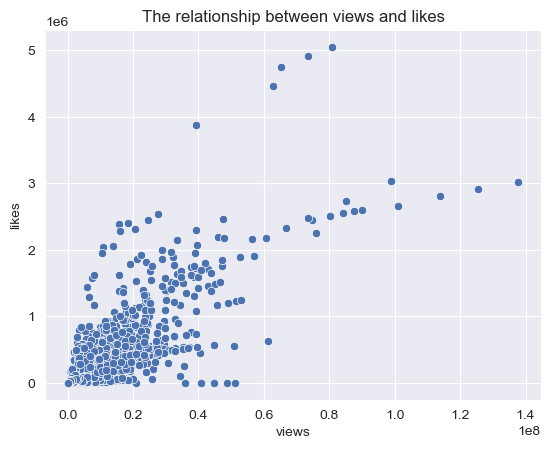

In [35]:
sns.scatterplot(x="views",y="likes",data=df_youtube)
plt.title('The relationship between views and likes')

> looking at the graph above, it's safe to say that yes the increasment in the likes causes an increasmment in the views as well. meaning there's a positive correlation between the both. 

In [36]:
fig = px.histogram(df_youtube, x="category_name", y="views",histfunc='count' , text_auto=True)
fig.show()

> As we saw in a previous graph, entertainment gets the most views. And it's very obvious that movies get the least views.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The Top Channel by Comment Count is ibighit.

> Movies has the height Likes.

> There is a higher relationship between views and likes.

> There is a positive relationship between the number of views and likes.

> The entertainment category has the most number of views.



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No I did not.

## Multivariate Exploration

Text(0.5, 1.0, 'The Relationship between likes, dislikes and views')

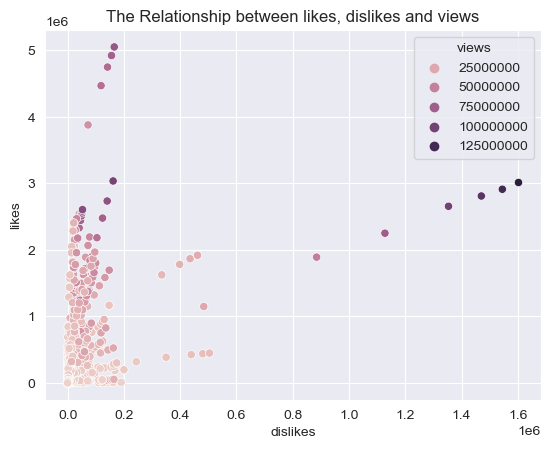

In [37]:
sns.scatterplot(x="dislikes",y="likes",data=df_youtube,hue='views')
plt.title("The Relationship between likes, dislikes and views")

> the nummbmer of likes and dislikes can effect on the nummber of views. The increasment in both can cause an increasment in the views as well. 

Text(0.5, 1.0, 'The Relationship between likes, dislikes and category_name')

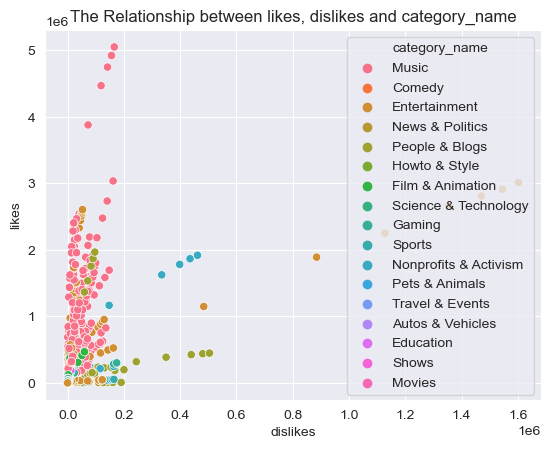

In [38]:
sns.scatterplot(x="dislikes",y="likes",data=df_youtube,hue='category_name')
plt.title("The Relationship between likes, dislikes and category_name")

> From the graph above we can see that music gets the most likes and New&Politics gets the most dislikes. 

<__array_function__ internals>:5: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

<__array_function__ internals>:5: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

<__array_function__ internals>:5: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

<__array_function__ internals>:5: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

<__array_function__ internals>:5: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

<__array_function__ internals>:5: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



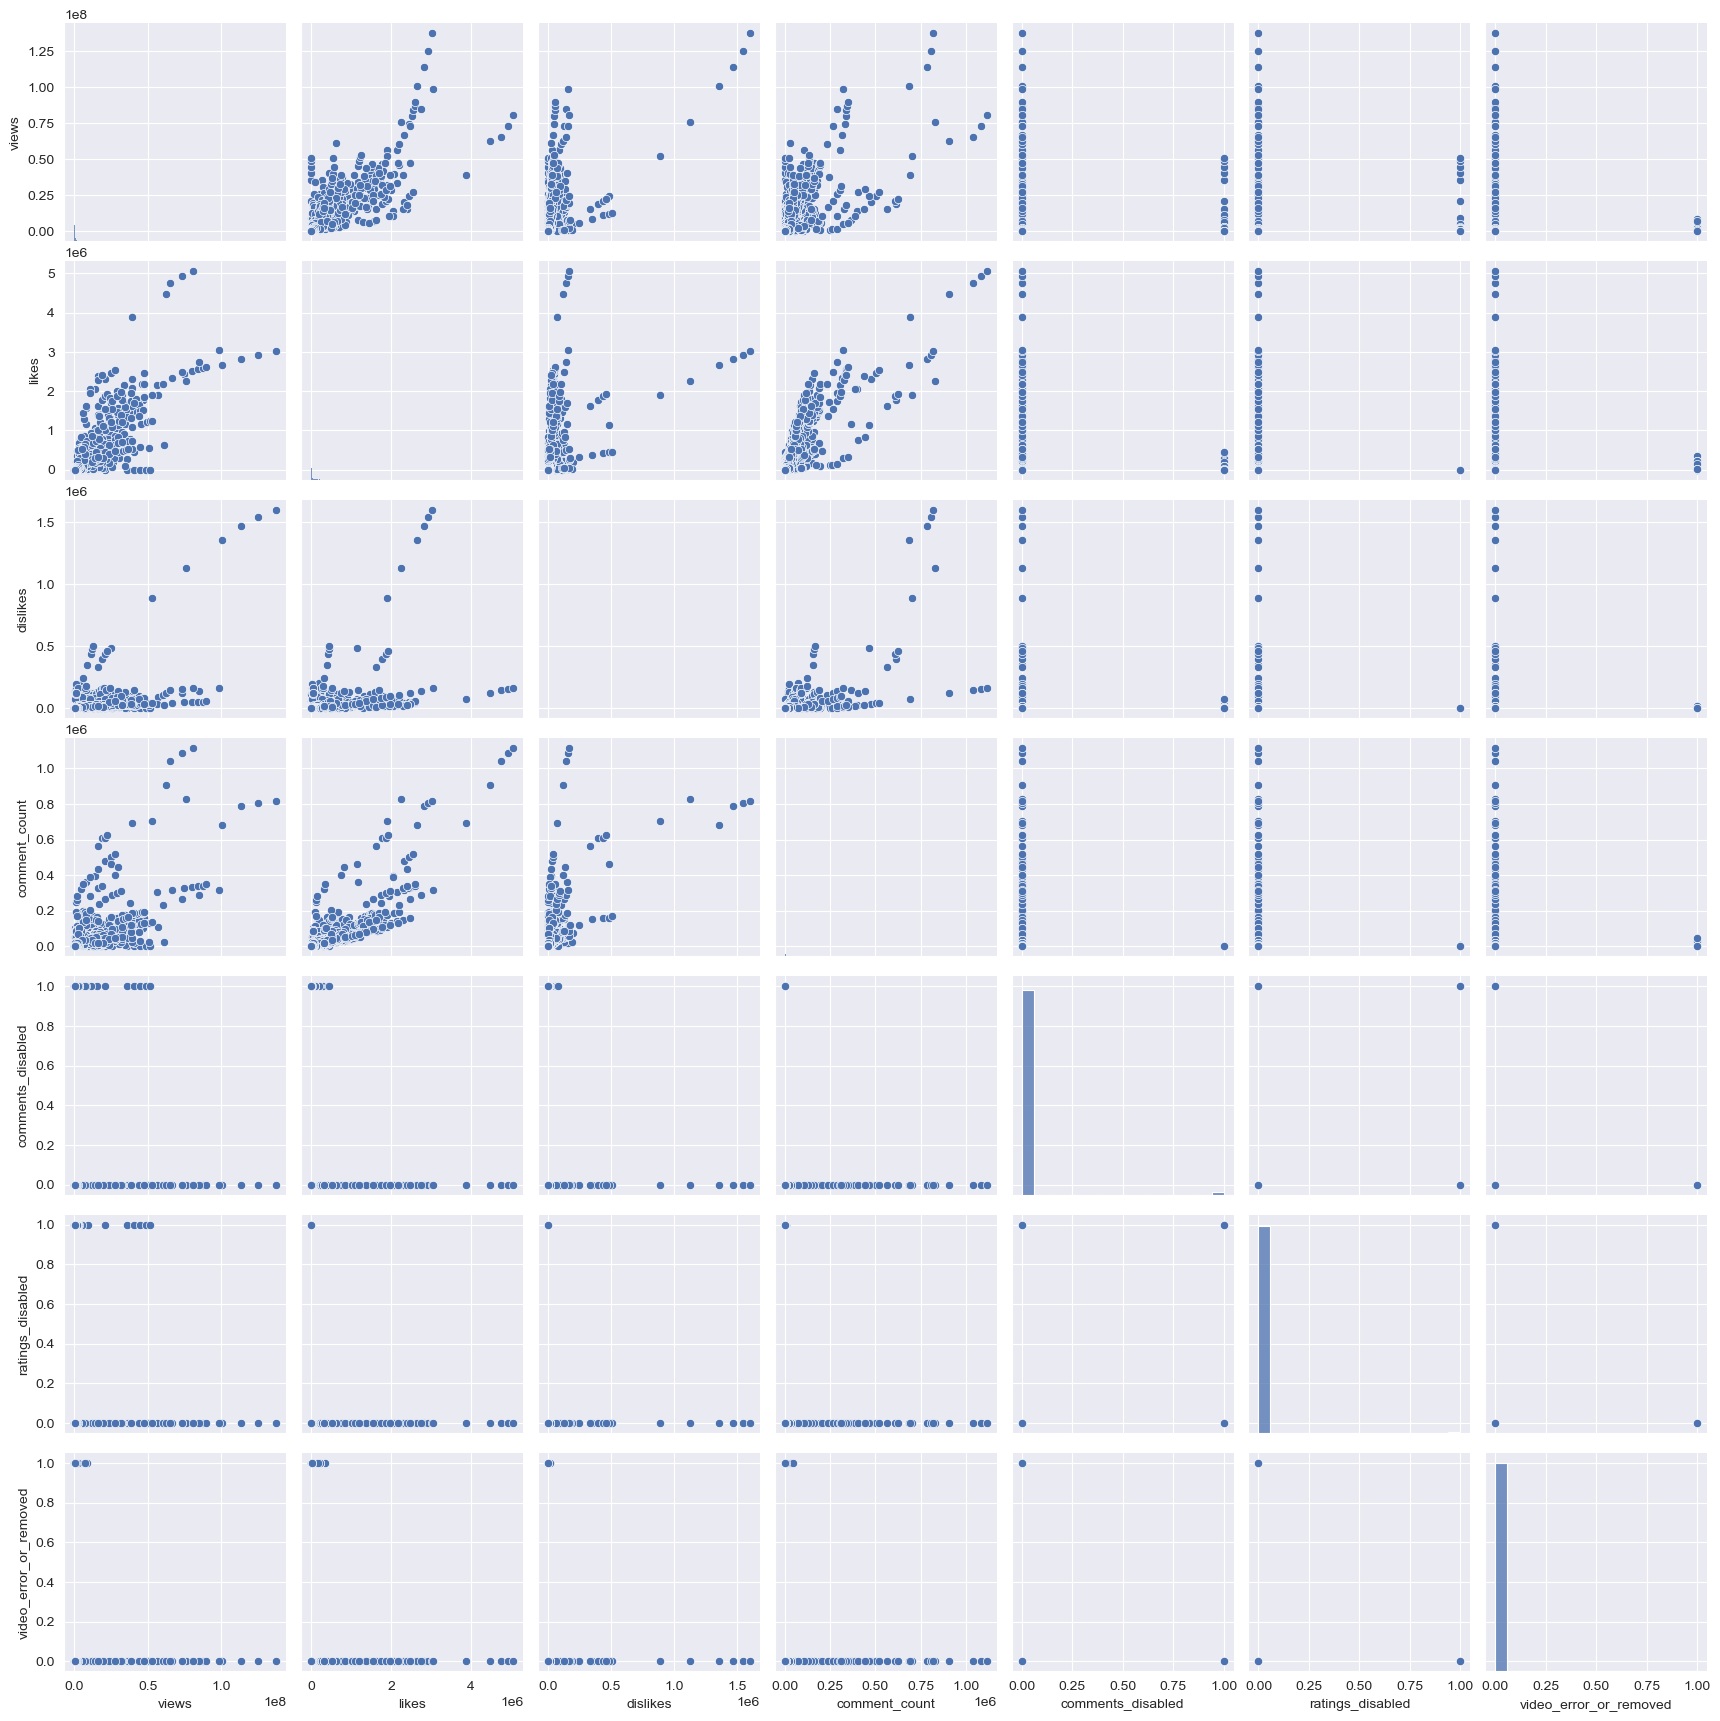

In [39]:
sns.pairplot(data=df_youtube);

Text(40.8701624228395, 0.5, 'comment_count')

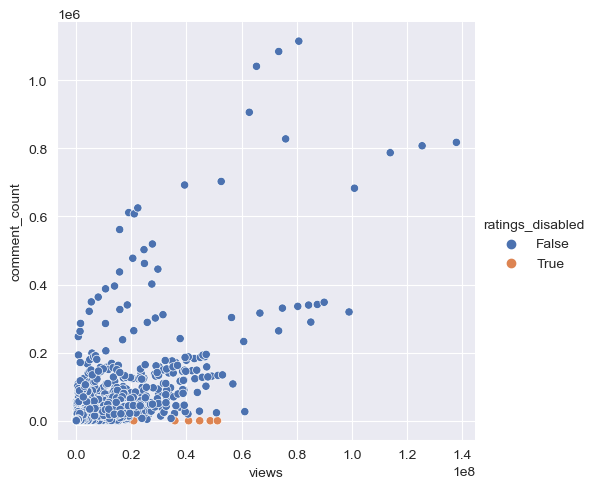

In [40]:
sns.relplot(x='views',y='comment_count',data=df_youtube,kind='scatter',hue='ratings_disabled')
plt.xlabel('views')
plt.ylabel('comment_count')

> Looking at the graph above we can notice that disabling ratings can effect on the views count. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> News & Politic has higher relationships with dislikes.

> The relationship is inverse between likes and dislikes. The higher the number of likes, the lower the number of dislikes

> As we see the rating_disabled are divided in two categories True and False the True are few and they refer to the views.

> most of the ratings_disabled are false.

> encreasment in likes and dislikes increases the number of views. 



### Were there any interesting or surprising interactions between features?

> yes, there is. between dislikes and views. 

## Conclusions
> The entertainment category on YouTube has the most views. 

> Movies receive the greatest number of likes.

> According to the correlation between number of views and number of likes, the number of likes increases as the number of views increases.

> IBIGHT has the highest number of comments.

> Relatively small number of ratings are disabled. These ratings are related to the number of views.

> According to the relationship between dislikes and views, as more dislikes are expressed, the number of views in Canda decreases.

> These findings could be useful for content creators, marketers, and advertisers in Canda in understanding and targeting their YouTube audiences more effectively.

> Disabling ratings can effect on the views count. 